# Description of Swedish mortality data

In this notebook we will look at different ways of summarizing data on daily counts of deaths in Sweden. The data comes from [Statistics Sweden](https://www.scb.se/hitta-statistik/corona/corona-i-statistiken/#Statistik). The dataset we will work with has been edited and all the deaths without a determined date has been removed. This means that the total number of death will be slightly lower than what it is in reality. 

Start by loading the dataset and printing the first few lines.

In [6]:
data <- readRDS("mortality_data_from_SCB.rds")
head(data)

,year,day_month,date,count,sex,agegr
,<dbl>,<chr>,<date>,<dbl>,<chr>,<chr>
1,2021,31 januari,2021-01-31,277,both,all
2,2021,30 januari,2021-01-30,273,both,all
3,2021,29 januari,2021-01-29,291,both,all
4,2021,28 januari,2021-01-28,285,both,all
5,2021,27 januari,2021-01-27,290,both,all
6,2021,26 januari,2021-01-26,288,both,all


The dataset contains the daily counts of number of persons who have died in Sweden from 2015-01-01 to 2021-01-31. Perhaps we could look at the average number of deaths per day and the total per year.

In [21]:
require(dplyr)
data %>% filter(sex=="both" & agegr=="all") %>% mutate(year=format(date,"%Y")) %>% group_by(year) %>%summarize(mean_p_day=mean(count),sum_p_year=sum(count))

`summarise()` ungrouping output (override with `.groups` argument)



year,mean_p_day,sum_p_year
<chr>,<dbl>,<dbl>
2015,246.4301,89947
2016,243.2213,89019
2017,245.8685,89742
2018,245.6767,89672
2019,236.0274,86150
2020,260.8224,95461
2021,315.3548,9776


We might want to break it down by sex.

In [20]:
data %>% filter(sex!="both" & agegr=="all") %>% mutate(year=format(date,"%Y")) %>% group_by(sex,year) %>%summarize(mean_p_day=mean(count),sum_p_year=sum(count))

`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,year,mean_p_day,sum_p_year
<chr>,<chr>,<dbl>,<dbl>
men,2015,119.9863,43795
men,2016,117.6803,43071
men,2017,118.7507,43344
men,2018,119.6466,43671
men,2019,115.7260,42240
men,2020,129.8525,47526
men,2021,157.6452,4887
women,2015,126.4438,46152
women,2016,125.5410,45948


Such annual summaries are very common and useful, but they hide some aspects of the data. Let's look at average number of deaths per month.

In [18]:
data %>% filter(sex=="both" & agegr=="all" & date<"2021-01-01") %>% mutate(month=format(date,"%m")) %>% group_by(month) %>%summarize(death_p_month=sum(count))

`summarise()` ungrouping output (override with `.groups` argument)



month,death_p_month
<chr>,<dbl>
01,51167
02,46424
03,49855
04,47843
05,44091
06,40157
07,41732
08,40950
09,40473


Which months do more people die in these data? How big are the differences?

Next, let's try to visualize the data. We will make a smoothed plot of total number of deaths as a function time. 


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.

Warning message:
“Removed 14 row(s) containing missing values (geom_path).”


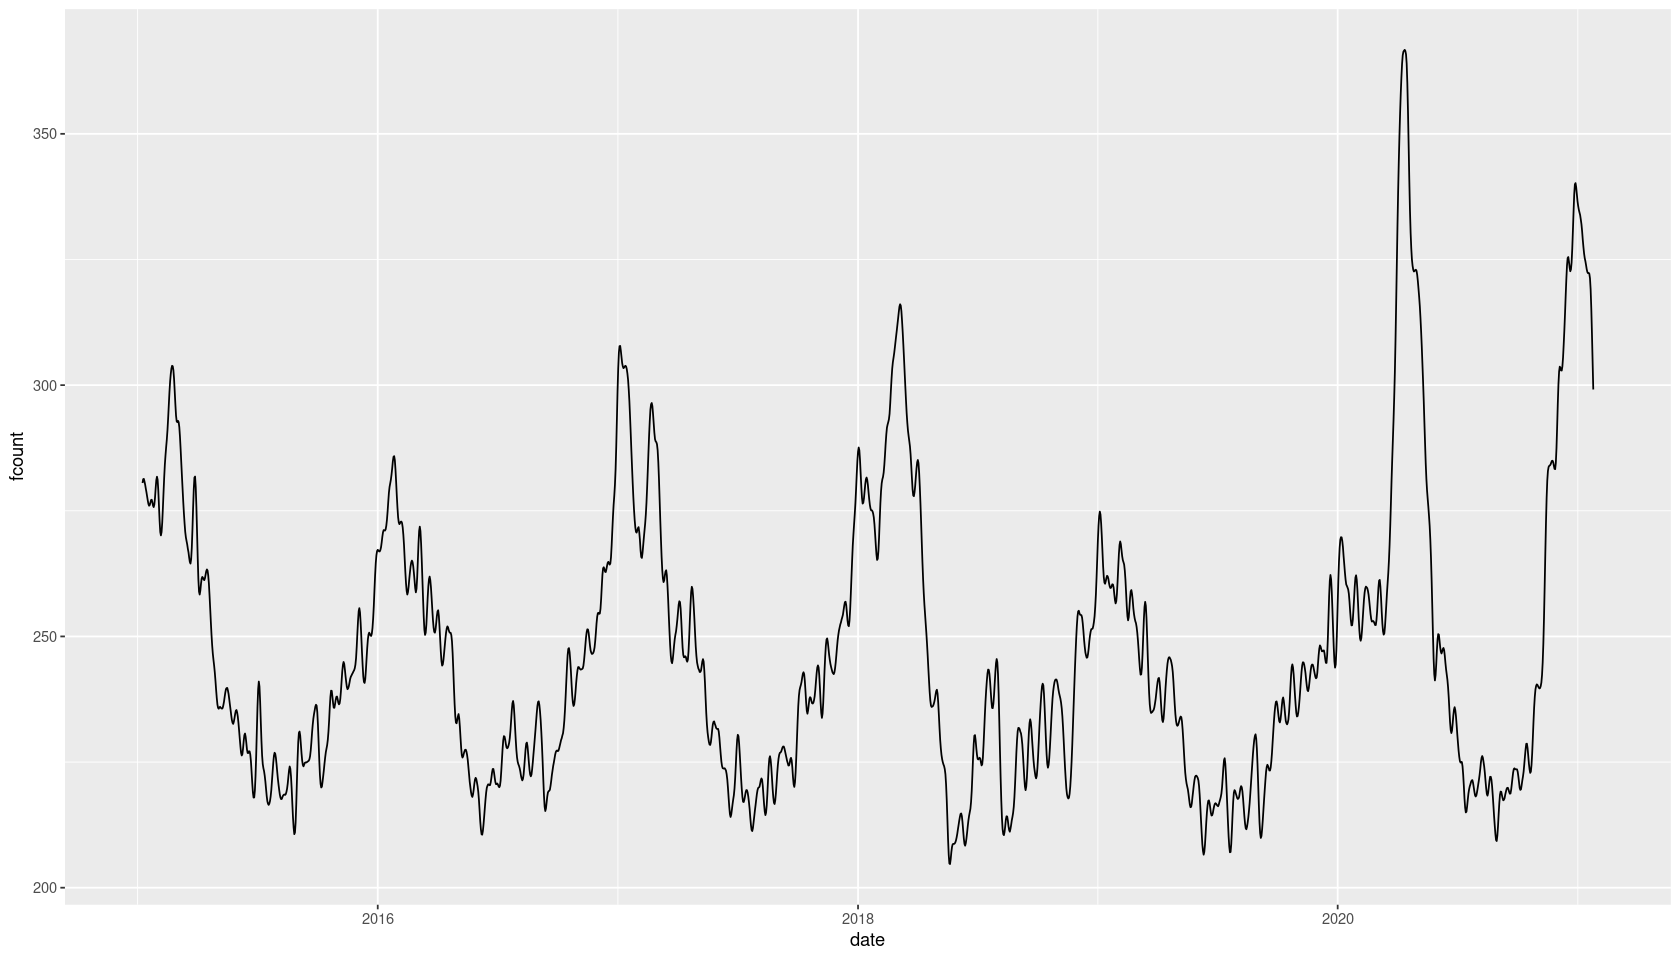

In [24]:
require(ggplot2)
options(repr.plot.width=14, repr.plot.height=8)
## prepare a dataset for plotting
## first we make a suitable filter to smooth the time series
ker <- dnorm(seq(-5,5,length.out=15),0,2)
ker <- ker/sum(ker)
pdat<- data %>% filter(sex=="both" & agegr=="all") %>% mutate(fcount=stats::filter(count,ker)) 
ggplot(data=pdat,aes(x=date,y=fcount))+geom_line()+ylab("deaths per day")+xlab("")